## Ernie Sumoso
## ID: 881591

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import math

In [2]:
housing = fetch_california_housing()
print(type(housing))
print(housing.target)

<class 'sklearn.utils._bunch.Bunch'>
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [3]:
data = housing.data[:, 0:2]
target = housing.target

In [4]:
df = pd.DataFrame(data, columns=['Feature0', 'Feature1'])
df['target'] = target
print(df.shape)
df.head()

(20640, 3)


,Feature0,Feature1,target
0,8.3252,41.0,4.526
1,8.3014,21.0,3.585
2,7.2574,52.0,3.521
3,5.6431,52.0,3.413
4,3.8462,52.0,3.422


In [5]:
def check_missing_values(df):
    # check for number of missing values per column
    print("# Missing Values")
    print(df.isna().sum())
    
    # check for % of missing values
    print("\n% Missing Values")
    print(df.isna().mean() * 100)
    
check_missing_values(df)

# Missing Values
Feature0    0
Feature1    0
target      0
dtype: int64

% Missing Values
Feature0    0.0
Feature1    0.0
target      0.0
dtype: float64


In [6]:
def check_duplicated_values(df):
    # check for number of duplicated values
    print("# Duplicated Values")
    print(df.duplicated().sum())
    
    # check for % of duplicated values
    print("\n% Duplicated Values")
    print(df.duplicated().mean() * 100)

check_duplicated_values(df)

# Duplicated Values
32

% Duplicated Values
0.15503875968992248


In [7]:
def check_nunique_values(df):
    # check number of unique values per column
    print("# Unique Values per Column")
    for col in df.columns:
        print("'"+col+"'", "# of unique values:", df[col].nunique())
        
    # check % of unique values per column (relative to number of total rows in the dataset)
    print("\n% Unique Values per Column")
    for col in df.columns:
        print("'"+col+"'", "% of unique values:", round(df[col].nunique() * 100 / df.shape[0], 2), "%")
        
check_nunique_values(df)

# Unique Values per Column
'Feature0' # of unique values: 12928
'Feature1' # of unique values: 52
'target' # of unique values: 3842

% Unique Values per Column
'Feature0' % of unique values: 62.64 %
'Feature1' % of unique values: 0.25 %
'target' % of unique values: 18.61 %


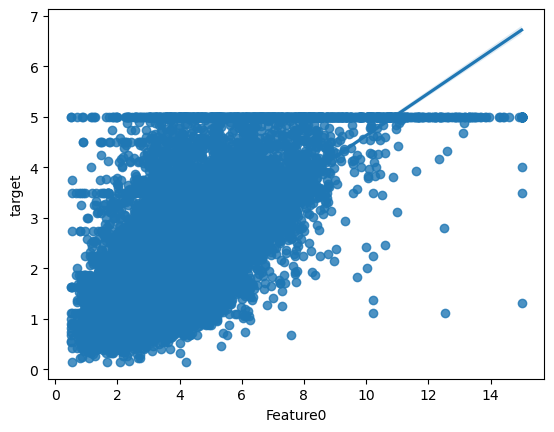

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(df, x="Feature0", y="target")
plt.show()

In [18]:
x = df[['Feature0', 'Feature1']]
y = df['target']
print('x shape:', x.shape)
print('y shape:', y.shape)

x shape: (20640, 2)
y shape: (20640,)


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (14448, 2)
x_test shape: (6192, 2)
y_train shape: (14448,)
y_test shape: (6192,)


In [20]:
# train a linear regression model
reg = LinearRegression()
model = reg.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [21]:
# R2 Score of train & test prediction
def display_r2_scores(y_train, y_pred_train, y_test, y_pred_test):
    r2_train = r2_score(y_train, y_pred_train)
    print('R2 Score train:', r2_train.round(4))
    r2_test = r2_score(y_test, y_pred_test)
    print('R2 Score test:', r2_test.round(4))
    
display_r2_scores(y_train, y_pred_train, y_test, y_pred_test)

R2 Score train: 0.5093
R2 Score test: 0.5087


In [22]:
# RMSE: root mean squared error
rmse_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE train:', round(rmse_train, 4))
rmse_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE test:', round(rmse_test, 4))

RMSE train: 0.8108
RMSE test: 0.803


In [23]:
# linear regression formula (y = m0x0 + m1x1 + b)
# b0 (intercept):
display(model.intercept_)
# m (slope) of every feature (m0 & m1):
display(model.coef_)

-0.10299578449607161

array([0.43176259, 0.01743944])

In [24]:
# Feature interactions
interaction = PolynomialFeatures(degree = 3, include_bias = False, interaction_only = False) # try True & False
# interaction_only: include only interactions between features, not lonely-features
# degree: max number of features to create
features_interaction = interaction.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(features_interaction, y, test_size=0.3, random_state=43)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
# feature space looks like:
x_train[1:4]

x_train shape: (14448, 9)
x_test shape: (6192, 9)
y_train shape: (14448,)
y_test shape: (6192,)


array([[2.31520000e+00, 2.50000000e+01, 5.36015104e+00, 5.78800000e+01,
        6.25000000e+02, 1.24098217e+01, 1.34003776e+02, 1.44700000e+03,
        1.56250000e+04],
       [3.96280000e+00, 2.90000000e+01, 1.57037838e+01, 1.14921200e+02,
        8.41000000e+02, 6.22309546e+01, 4.55409731e+02, 3.33271480e+03,
        2.43890000e+04],
       [3.21510000e+00, 7.00000000e+00, 1.03368680e+01, 2.25057000e+01,
        4.90000000e+01, 3.32340643e+01, 7.23580761e+01, 1.57539900e+02,
        3.43000000e+02]])

In [25]:
regression = LinearRegression()
model = regression.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [26]:
display_r2_scores(y_train, y_pred_train, y_test, y_pred_test)

R2 Score train: 0.5326
R2 Score test: 0.5535


In [27]:
polynomial = PolynomialFeatures(degree = 3, include_bias = False) # degree: max power of x, high values often create overfitting
features_polynomial = polynomial.fit_transform(x)
features_polynomial[0]

array([8.32520000e+00, 4.10000000e+01, 6.93089550e+01, 3.41333200e+02,
       1.68100000e+03, 5.77010912e+02, 2.84166716e+03, 1.39946612e+04,
       6.89210000e+04])

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features_polynomial, y, test_size=0.3, random_state=43)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
# feature space looks like:
x_train[1:4]

x_train shape: (14448, 9)
x_test shape: (6192, 9)
y_train shape: (14448,)
y_test shape: (6192,)


array([[2.31520000e+00, 2.50000000e+01, 5.36015104e+00, 5.78800000e+01,
        6.25000000e+02, 1.24098217e+01, 1.34003776e+02, 1.44700000e+03,
        1.56250000e+04],
       [3.96280000e+00, 2.90000000e+01, 1.57037838e+01, 1.14921200e+02,
        8.41000000e+02, 6.22309546e+01, 4.55409731e+02, 3.33271480e+03,
        2.43890000e+04],
       [3.21510000e+00, 7.00000000e+00, 1.03368680e+01, 2.25057000e+01,
        4.90000000e+01, 3.32340643e+01, 7.23580761e+01, 1.57539900e+02,
        3.43000000e+02]])

In [29]:
regression = LinearRegression()
model = regression.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
display_r2_scores(y_train, y_pred_train, y_test, y_pred_test)

R2 Score train: 0.5326
R2 Score test: 0.5535


In [30]:
# Regularization (technique to prevent overfitting for having a complex model)
# to minimize the error the algorithm will choose smaller betas (to minimize the 2nd sigma from the formula)
# having smaller betas means you are preventing an overfitted model and can also set betas close or equal to zero (unimportant features)
# 3 regularization techniques:

In [31]:
# Ridge (L2)
x = df[['Feature0', 'Feature1']]
y = df[['target']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=43)
regression = Ridge(alpha=0.5)
model = regression.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
display_r2_scores(y_train, y_pred_train, y_test, y_pred_test)

R2 Score train: 0.5022
R2 Score test: 0.5252


In [32]:
# Lasso (L1) 
regression = Lasso(alpha=0.5)
model = regression.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
display_r2_scores(y_train, y_pred_train, y_test, y_pred_test)

R2 Score train: 0.4456
R2 Score test: 0.4658


In [33]:
# ElasticNet (L1 & l2)
from sklearn.linear_model import ElasticNet

regression = ElasticNet(alpha=0.5)
model = regression.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
display_r2_scores(y_train, y_pred_train, y_test, y_pred_test)

R2 Score train: 0.4774
R2 Score test: 0.4992
